<a href="https://colab.research.google.com/github/Vrishin-Reddy/Mini_Proj/blob/master/Final_of_SER(1500).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Emotion Recognition using the RAVDESS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Librosa library(A python package) for extracting important features of the audio like the pitch,tone.

In [ ]:
!pip install librosa
!pip install --upgrade librosa
!pip install librosa[display]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Loading one audio file from the drive using librosa.
Librosa loads the audio file as a floating point time series.

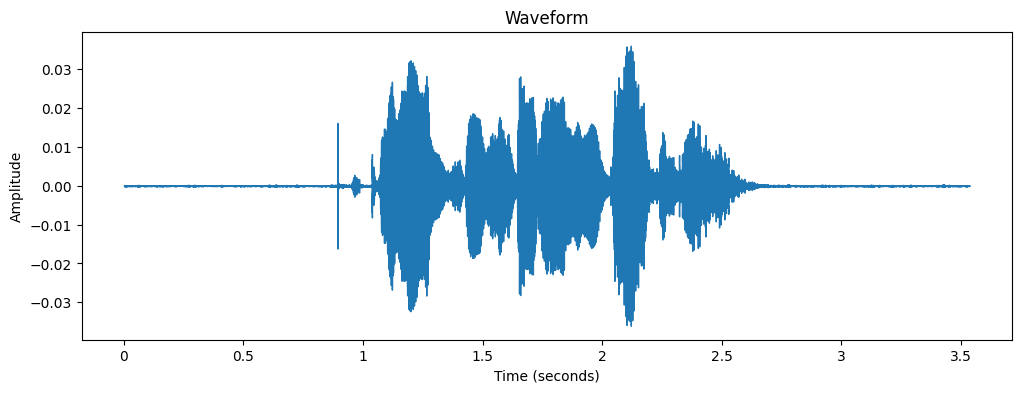

In [ ]:
import librosa
import librosa.display
from pylab import *
from librosa import *
import matplotlib.pyplot as plt

audio_path='/content/drive/My Drive/Ravtess/03-01-01-01-02-01-08.wav'
# # audio_path='/content/drive/My Drive/Ravtess/03-02-06-02-02-02-04.wav'

# audio_path='/content/drive/My Drive/Ravtess/03-01-08-01-02-01-08.wav'

signal, sr = librosa.load(audio_path, sr=None)


plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

Plotting the audio file which was just loaded by librosa using waveplot function of librosa.This Function Plots the amplitude envelope of a waveform.

# Load all files

We will create our numpy array extracting Mel-frequency cepstral coefficients (MFCCs), while the classes to predict will be extracted from the name of the file depends on the dataset.

In [ ]:
!pip install resampy
!pip install --upgrade resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import resampy
import time

import os
path = '/content/drive/My Drive/Ravtess/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new
        X, sr = librosa.load(os.path.join(subdir,file), sr=None)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

<ipython-input-13-9bbb653e383c>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sr = librosa.load(os.path.join(subdir,file), sr=None)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-9bbb653e383c>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sr = librosa.load(os.path.join(subdir,file), sr=None)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-9bbb653e383c>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sr = librosa.load(os.path.join(subdir,file), sr=None)
/u

--- Data loaded. Loading time: 332.3664209842682 seconds ---


In [ ]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((4111, 40), (4111,))

In [ ]:
# Saving files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/content/drive/My Drive/Ravtess_model'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [ ]:
# Loading saved models
import joblib
X = joblib.load('/content/drive/My Drive/Ravtess_model/X.joblib')
y = joblib.load('/content/drive/My Drive/Ravtess_model/y.joblib')

# Decision Tree Classifier
# Logistic Regression
# SVC
To make a first attempt in accomplishing this classification task we chose a decision tree , logistic regression and SVC to make certain decision

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=100000)

In [ ]:
from sklearn.svm import SVC
svc = SVC(max_iter=1000)
svc.fit(X_train, y_train)

SVC(max_iter=1000)

In [ ]:
dtree_preds = dtree.predict(X_test)
lr_preds = lr.predict(X_test)
svc_preds = svc.predict(X_test)

In [ ]:
predictions = (dtree_preds, lr_preds, svc_preds)

In [ ]:
from sklearn.metrics import classification_report

# Deciion Tree Classifier
dtree_predictions = dtree.predict(X_test)
dtree_report = classification_report(y_test, dtree_predictions)

# Logistic Regresion
lr_predictions = lr.predict(X_test)
lr_report = classification_report(y_test, lr_predictions)

# Support Vector Classifier
svc_predictions = svc.predict(X_test)
svc_report = classification_report(y_test, svc_predictions)

print("Decision Tree Classifier Report:\n", dtree_report)
print("Logistic Regression Report:\n", lr_report)
print("Support Vector Classifier Report:\n", svc_report)

Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.55      0.46      0.50       111
           1       0.62      0.67      0.64       230
           2       0.42      0.68      0.52       231
           3       0.56      0.49      0.52       214
           4       0.59      0.66      0.62       215
           5       0.58      0.40      0.48       207
           6       0.33      0.21      0.26        71
           7       0.46      0.21      0.28        78

    accuracy                           0.53      1357
   macro avg       0.52      0.47      0.48      1357
weighted avg       0.54      0.53      0.52      1357

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.45      0.32      0.37       111
           1       0.53      0.57      0.55       230
           2       0.40      0.54      0.46       231
           3       0.42      0.44      0.43       214
           4   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural network

In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((2754, 40, 1), (1357, 40, 1))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:

cnnhistory=model.fit(x_traincnn, y_train, batch_size=12, epochs=1500, validation_data=(x_testcnn, y_test))

Epoch 1/1500
230/230 [==============================] - 6s 19ms/step - loss: 5.3036 - accuracy: 0.1500 - val_loss: 2.4173 - val_accuracy: 0.2299
Epoch 2/1500
230/230 [==============================] - 4s 16ms/step - loss: 3.7348 - accuracy: 0.1576 - val_loss: 2.4123 - val_accuracy: 0.1599
Epoch 3/1500
230/230 [==============================] - 3s 15ms/step - loss: 2.9119 - accuracy: 0.1699 - val_loss: 2.0215 - val_accuracy: 0.1990
Epoch 4/1500
230/230 [==============================] - 3s 14ms/step - loss: 2.5118 - accuracy: 0.1834 - val_loss: 1.9450 - val_accuracy: 0.2358
Epoch 5/1500
230/230 [==============================] - 5s 20ms/step - loss: 2.2549 - accuracy: 0.1895 - val_loss: 1.9384 - val_accuracy: 0.2955
Epoch 6/1500
230/230 [==============================] - 3s 15ms/step - loss: 2.1774 - accuracy: 0.2001 - val_loss: 1.9301 - val_accuracy: 0.2476
Epoch 7/1500
230/230 [==============================] - 3s 15ms/step - loss: 2.0901 - accuracy: 0.2186 - val_loss: 1.8756 - val_ac

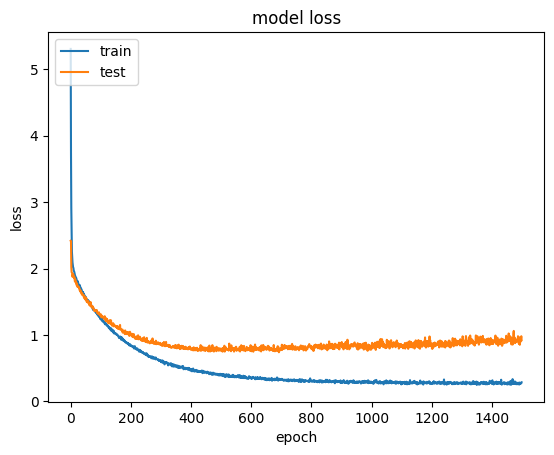

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

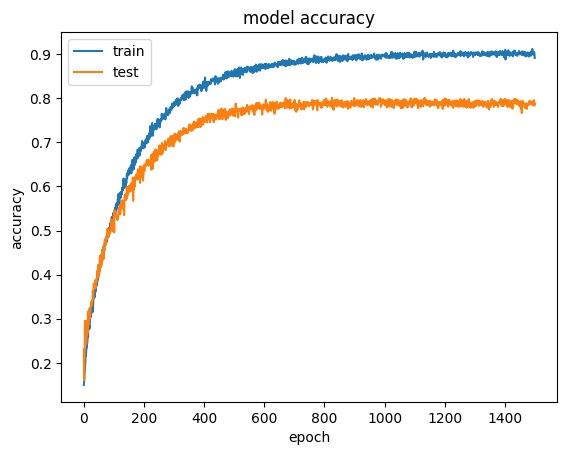

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x_testcnn)
predicted_classes = predictions.argmax(axis=1)

43/43 [==============================] - 0s 4ms/step


In [ ]:
predictions

array([[1.2119258e-09, 3.1441741e-05, 2.0651090e-05, ..., 5.2845571e-05,
        6.3850180e-08, 1.0902141e-12],
       [1.2093003e-12, 9.9999994e-01, 6.8598134e-11, ..., 1.8410854e-15,
        6.4005971e-16, 2.4253226e-35],
       [9.9999982e-01, 1.5969962e-07, 1.1685291e-16, ..., 3.6378748e-17,
        3.4300124e-13, 4.8610619e-22],
       ...,
       [1.7371175e-13, 1.6048565e-05, 9.9998391e-01, ..., 5.6665945e-14,
        9.5574301e-24, 2.0315371e-30],
       [2.0975776e-16, 1.0075370e-12, 1.9669551e-08, ..., 3.8271317e-11,
        7.7993769e-13, 5.2721656e-15],
       [8.6392189e-05, 2.0338608e-04, 3.0247136e-05, ..., 9.9875319e-01,
        2.1081790e-04, 7.0778618e-04]], dtype=float32)

In [ ]:
y_test

array([4, 1, 0, ..., 2, 4, 5])

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
new_Ytest

array([4, 1, 0, ..., 2, 4, 5])

In [ ]:
import numpy as np

# Assuming new_Ytest is a 1D aray with shape (n,)
# Conert it to a 2D array with shape (n, 1)
new_Ytest = np.reshape(new_Ytest, (-1, 1))
from sklearn.metrics import classification_report
predictions_int = np.argmax(predictions, axis=1)
report = classification_report(new_Ytest.argmax(axis=1), predictions_int)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.08      0.14      1357
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.08      1357
   macro avg       0.12      0.01      0.02      1357
weighted avg       1.00      0.08      0.14      1357



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.argmax(new_Ytest, axis=1), np.argmax(predictions, axis=1))
print(matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[106 228 209 182 315 196  58  63]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [ ]:
model.save('testing10_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
new_model=keras.models.load_model('testing10_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [ ]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

43/43 [==============================] - 0s 5ms/step - loss: 0.9221 - accuracy: 0.7878
Restored model, accuracy: 78.78%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming x_testcnn and y_test are the test data
y_pred = new_model.predict(x_testcnn)
y_pred_int = np.argmax(y_pred, axis=1)

# Reshape y_test to have the same number of rows as y_pred, and a single column
y_test_reshaped = y_test.reshape(-1, 1)

# Generate classification report
report = classification_report(y_test_reshaped, y_pred_int)

# Print the report and accuracy
print(report)
acc = np.sum(y_pred_int == y_test_reshaped.flatten()) / len(y_test_reshaped)
print("Accuracy: {:5.2f}%".format(100*acc))
